Completar alguna introducción

In [1]:
import parseData
import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Nombre del archivo de texto con los datos de las 3 placas
fileName = "./20_01_2024_17_34_34_data.txt"
numberOfSamplesForEach = 1800

n_k = 1e6

In [3]:
# Se obtienen los datos crudos del archivo
fileHandler = open(fileName,"rt")
data = parseData.parse_data_file(fileHandler)
fileHandler.close()

In [4]:
# Los datos leidos contienen otra información aparte de los timestamps. Se extrae el valor de timestamp
# de cada muestra. Además, se calcula el delta entre muestras, para luego graficar. Esto se hace para las
# 3 placas.
timestampsDict = {}
deltaTimestampsDict = {}

for d in data:
    # Reviso el valor de nodeID en el dato
    nodeID = d.m_nodeID
    
    if(nodeID not in timestampsDict.keys()):
        timestampsDict[nodeID] = []
        
    timestampsDict[nodeID].append(d.m_useconds)

for nodeID in timestampsDict.keys():
    timestampsDict[nodeID].pop(0)
    
    
for nodeID in timestampsDict.keys():
    deltaTimestampsDict[nodeID] = []
    for i in range(0,numberOfSamplesForEach-1):
        deltaTimestampsDict[nodeID].append(timestampsDict[nodeID][i+1] - timestampsDict[nodeID][i] - n_k)

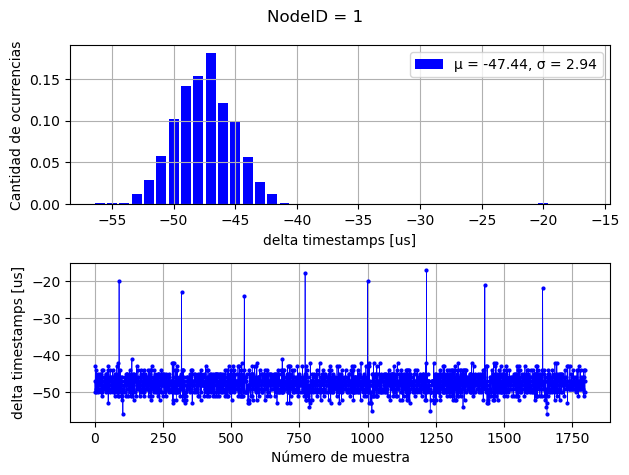

In [39]:
# se hace un gráfico de barras con los resultados de deltaTimestamps para la placa 1
nodeID = 1
if(nodeID in deltaTimestampsDict.keys()):
    
    # se calcula una media y desvío
    #mu_1 = np.mean(deltaTimestampsDict[nodeID])
    #sigma_1 = np.std(deltaTimestampsDict[nodeID])
    
    #mu_1, sigma_1 = utils.mean_and_std(deltaTimestampsDict[nodeID])
    
    # Generate data points for the Gaussian distribution
    #soporte_1 = np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, 100)
    #normal_1 = (1/(sigma_1 * np.sqrt(2*np.pi))) * np.exp(-0.5*((soporte_1 - mu_1)/sigma_1)**2)
    
    leyenda = 'μ = ' + "{:.2f}".format(mu_1) + ", σ = " + "{:.2f}".format(sigma_1)
    
    # gráfico
    fig, ax = plt.subplots(2,1)
    unique1, counts1 = np.unique(deltaTimestampsDict[nodeID], return_counts=True)
    counts1 = counts1/len(deltaTimestampsDict[nodeID])
    ax[0].bar(x=unique1, height=counts1,color='b',label = leyenda)
    
    #ax[0].plot(soporte_1, normal_1,'b-',linewidth=1)
    
    ax[0].set_xlabel("delta timestamps [us]")
    ax[0].set_ylabel("Cantidad de ocurrencias")
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(deltaTimestampsDict[nodeID],'bo',markersize=2)
    ax[1].plot(deltaTimestampsDict[nodeID],'b-',linewidth=0.5)
    ax[1].set_xlabel("Número de muestra")
    ax[1].set_ylabel("delta timestamps [us]")
    ax[1].grid(True)

    fig.suptitle('NodeID = 1')
    fig.tight_layout()
    
    fig.savefig('placa_1.png', bbox_inches='tight')
    
else:
    print("No hay datos del nodeID = 1")

In [73]:
# Se busca la posición de los picos que aparecen en el gráfico temporal
nodeID = 1

peaks1 = []
dt_threshold = -30

for i in range(0, len(deltaTimestampsDict[nodeID])):
    dt = deltaTimestampsDict[nodeID][i]
    if dt > dt_threshold:
        peaks1.append(i)

print(peaks1)
for p in peaks1:
    print(deltaTimestampsDict[nodeID][p])

[89, 318, 548, 771, 1000, 1216, 1430, 1642]
-20.0
-23.0
-24.0
-18.0
-20.0
-17.0
-21.0
-22.0


In [74]:
212+214+216+229+223+230+229

1553

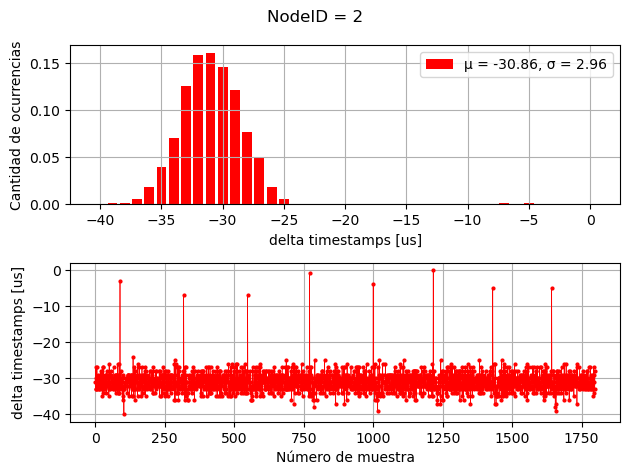

In [28]:
# se hace un gráfico de barras con los resultados de deltaTimestamps para la placa 2
nodeID = 2
if(nodeID in deltaTimestampsDict.keys()):
    
    # se calcula una media y desvío
    #mu_2 = np.mean(deltaTimestampsDict[nodeID])
    #sigma_2 = np.std(deltaTimestampsDict[nodeID])
    
    mu_2, sigma_2 = utils.mean_and_std(deltaTimestampsDict[nodeID])
    
    # Generate data points for the Gaussian distribution
    #soporte_2 = np.linspace(mu_2 - 3*sigma_2, mu_2 + 3*sigma_2, 100)
    #normal_2 = (1/(sigma_2 * np.sqrt(2*np.pi))) * np.exp(-0.5*((soporte_2 - mu_2)/sigma_2)**2)
    
    leyenda = 'μ = ' + "{:.2f}".format(mu_2) + ", σ = " + "{:.2f}".format(sigma_2)
    
    fig, ax = plt.subplots(2,1)
    unique2, counts2 = np.unique(deltaTimestampsDict[nodeID], return_counts=True)
    counts2 = counts2/len(deltaTimestampsDict[nodeID])
    ax[0].bar(x=unique2, height=counts2,color='r', label = leyenda)
    
    #ax[0].plot(soporte_2, normal_2,'r-',linewidth=1)
    
    ax[0].set_xlabel("delta timestamps [us]")
    ax[0].set_ylabel("Cantidad de ocurrencias")
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(deltaTimestampsDict[nodeID],'ro',markersize=2)
    ax[1].plot(deltaTimestampsDict[nodeID],'r-',linewidth=0.5)
    ax[1].set_xlabel("Número de muestra")
    ax[1].set_ylabel("delta timestamps [us]")
    ax[1].grid(True)

    fig.suptitle('NodeID = 2')    
    
    fig.tight_layout()
    
    fig.savefig('placa_2.png', bbox_inches='tight')
    
else:
    print("No hay datos del nodeID = 2")

In [72]:
# Se busca la posición de los picos que aparecen en el gráfico temporal
nodeID = 2

peaks2 = []
dt_threshold = -10

for i in range(0, len(deltaTimestampsDict[nodeID])):
    dt = deltaTimestampsDict[nodeID][i]
    if dt > dt_threshold:
        peaks2.append(i)

print(peaks2)
for p in peaks2:
    print(deltaTimestampsDict[nodeID][p])

[89, 318, 548, 771, 1000, 1216, 1430, 1642]
-3.0
-7.0
-7.0
-1.0
-4.0
0.0
-5.0
-5.0


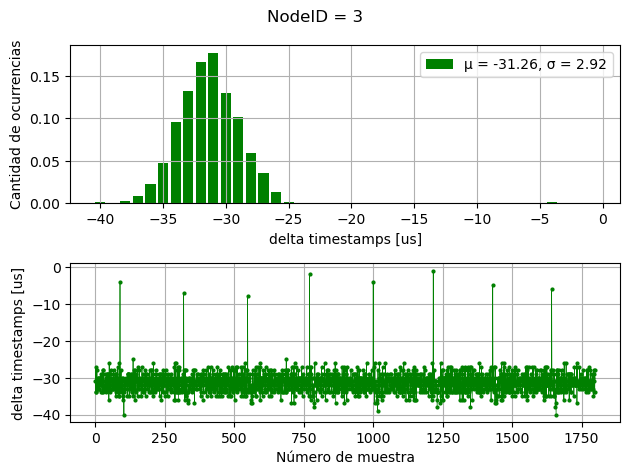

In [30]:
# se hace un gráfico de barras con los resultados de deltaTimestamps para la placa 3
nodeID = 3
if(nodeID in deltaTimestampsDict.keys()):
    
    mu_3, sigma_3 = utils.mean_and_std(deltaTimestampsDict[nodeID])
    
    # Generate data points for the Gaussian distribution
    #soporte_3 = np.linspace(mu_3 - 3*sigma_3, mu_3 + 3*sigma_3, 100)
    #normal_3 = (1/(sigma_3 * np.sqrt(2*np.pi))) * np.exp(-0.5*((soporte_3 - mu_3)/sigma_3)**2)
    
    leyenda = 'μ = ' + "{:.2f}".format(mu_3) + ", σ = " + "{:.2f}".format(sigma_3)
    
    fig, ax = plt.subplots(2,1)
    unique3, counts3 = np.unique(deltaTimestampsDict[nodeID], return_counts=True)
    counts3 = counts3/len(deltaTimestampsDict[nodeID])
    ax[0].bar(x=unique3, height=counts3,color='g', label = leyenda)
    
    #ax[0].plot(soporte_3, normal_3,'g-',linewidth=1)
    
    ax[0].set_xlabel("delta timestamps [us]")
    ax[0].set_ylabel("Cantidad de ocurrencias")
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(deltaTimestampsDict[nodeID],'go',markersize=2)
    ax[1].plot(deltaTimestampsDict[nodeID],'g-',linewidth=0.5)
    ax[1].set_xlabel("Número de muestra")
    ax[1].set_ylabel("delta timestamps [us]")
    ax[1].grid(True)
    
    fig.suptitle('NodeID = 3')

    fig.tight_layout()
    
    fig.savefig('placa_3.png', bbox_inches='tight')
    
else:
    print("No hay datos del nodeID = 3")

In [71]:
# Se busca la posición de los picos que aparecen en el gráfico temporal
nodeID = 3

peaks3 = []
dt_threshold = -10

for i in range(0, len(deltaTimestampsDict[nodeID])):
    dt = deltaTimestampsDict[nodeID][i]
    if dt > dt_threshold:
        peaks3.append(i)

print(peaks3)
for p in peaks3:
    print(deltaTimestampsDict[nodeID][p])

[89, 318, 548, 771, 1000, 1216, 1430, 1642]
-4.0
-7.0
-8.0
-2.0
-4.0
-1.0
-5.0
-6.0


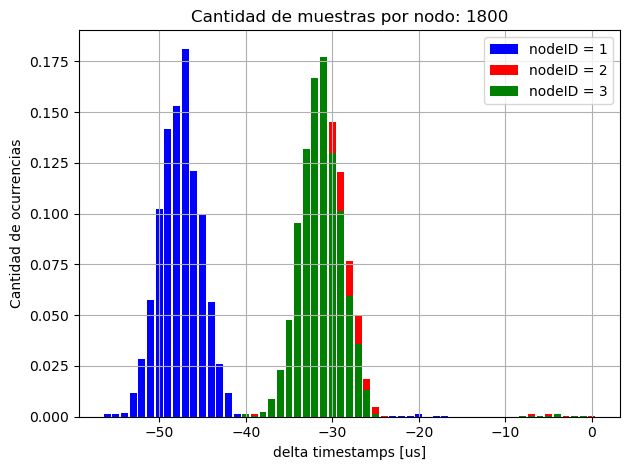

In [63]:
# Se hace un gráfico superpuesto de los 3 histogramas, con el objetivo de comparar
fig, ax = plt.subplots(1,1)

titulo = "Cantidad de muestras por nodo: " + str(numberOfSamplesForEach)

# Placa 1
nodeID = 1
if(nodeID in deltaTimestampsDict.keys()):
    unique1, counts1 = np.unique(deltaTimestampsDict[nodeID], return_counts=True)
    counts1 = counts1/len(deltaTimestampsDict[nodeID])
    ax.bar(x=unique1, height=counts1,color='b',label = "nodeID = 1")

# Placa 2
nodeID = 2
if(nodeID in deltaTimestampsDict.keys()):
    unique2, counts2 = np.unique(deltaTimestampsDict[nodeID], return_counts=True)
    counts2 = counts2/len(deltaTimestampsDict[nodeID])
    ax.bar(x=unique2, height=counts2,color='r', label = "nodeID = 2")

    
# Placa 3
nodeID = 3
if(nodeID in deltaTimestampsDict.keys()):
    unique3, counts3 = np.unique(deltaTimestampsDict[nodeID], return_counts=True)
    counts3 = counts3/len(deltaTimestampsDict[nodeID])
    ax.bar(x=unique3, height=counts3,color='g', label = "nodeID = 3")
    
ax.set_xlabel("delta timestamps [us]")
ax.set_ylabel("Cantidad de ocurrencias")
ax.set_title(titulo)
ax.legend()
ax.grid(True)

fig.tight_layout()

fig.savefig('histogramas_3_placas.png', bbox_inches='tight')

Se van a calcular los offsets de las 3 placas. Se define el offset como la diferencia entre la cantidad de microticks contados por dos relojes j,k. Se va a graficar el offset entre las placas (1,2), (1,3) y (2,3)

In [64]:
offset_1_2 = []
offset_1_3 = []
offset_2_3 = []

for i in range(0,numberOfSamplesForEach-1):
    offset_1_2.append( np.abs(timestampsDict[1][i] - timestampsDict[2][i]) )
    offset_1_3.append( np.abs(timestampsDict[1][i] - timestampsDict[3][i]) )
    offset_2_3.append( np.abs(timestampsDict[2][i] - timestampsDict[3][i]) )

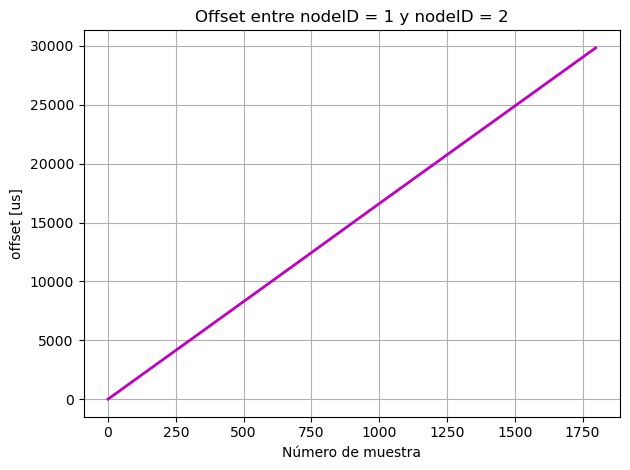

In [65]:
# Se grafica el offset entre 1 y 2
fig, ax = plt.subplots(1,1)

#ax.plot(offset_1_2,'mo',markersize=2)
ax.plot(offset_1_2,'m-',linewidth=2.0)

ax.set_xlabel("Número de muestra")
ax.set_ylabel("offset [us]")
ax.grid(True)
ax.set_title("Offset entre nodeID = 1 y nodeID = 2")

fig.tight_layout()

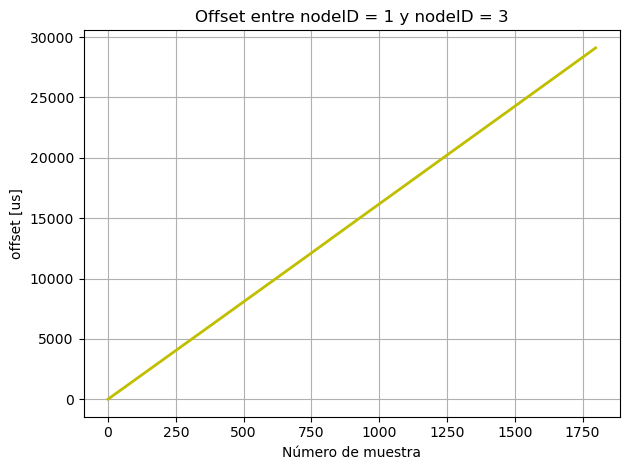

In [22]:
# Se grafica el offset entre 1 y 3
fig, ax = plt.subplots(1,1)

#ax.plot(offset_1_3,'yo',markersize=2)
ax.plot(offset_1_3,'y-',linewidth=2.0)

ax.set_xlabel("Número de muestra")
ax.set_ylabel("offset [us]")
ax.grid(True)
ax.set_title("Offset entre nodeID = 1 y nodeID = 3")

fig.tight_layout()

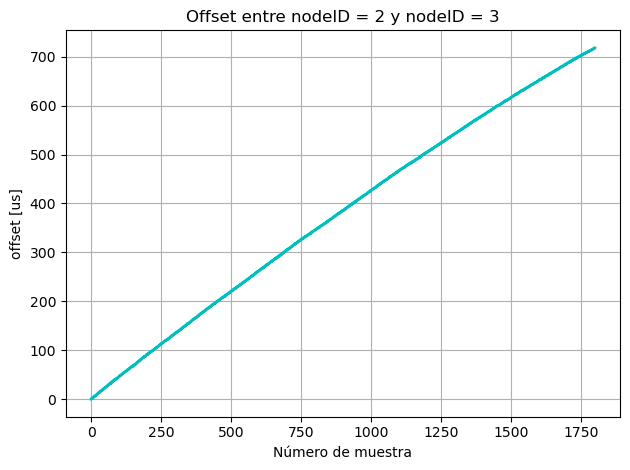

In [23]:
# Se grafica el offset entre 2 y 3
fig, ax = plt.subplots(1,1)

#ax.plot(offset_2_3,'co',markersize=2)
ax.plot(offset_2_3,'c-',linewidth=2.0)

ax.set_xlabel("Número de muestra")
ax.set_ylabel("offset [us]")
ax.grid(True)
ax.set_title("Offset entre nodeID = 2 y nodeID = 3")

fig.tight_layout()

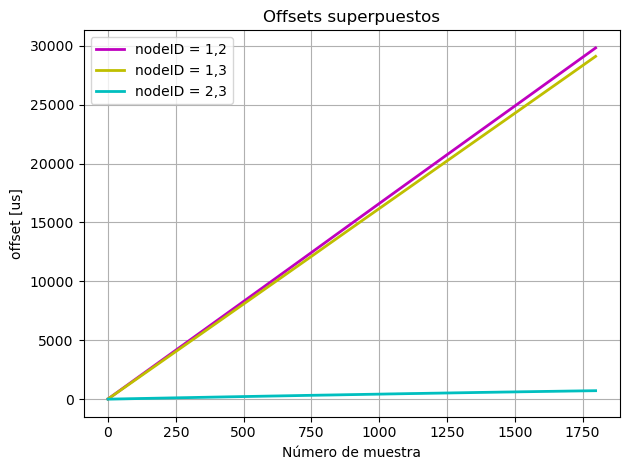

In [32]:
# Se grafican los offsets de las 3 placas superpuestos
fig, ax = plt.subplots(1,1)

#ax.plot(offset_1_2,'mo',markersize=2)
ax.plot(offset_1_2,'m-',linewidth=2.0, label = "nodeID = 1,2")

#ax.plot(offset_1_3,'yo',markersize=2)
ax.plot(offset_1_3,'y-',linewidth=2.0, label = "nodeID = 1,3")

#ax.plot(offset_2_3,'co',markersize=2)
ax.plot(offset_2_3,'c-',linewidth=2.0, label = "nodeID = 2,3")

ax.set_xlabel("Número de muestra")
ax.set_ylabel("offset [us]")
ax.legend()
ax.grid(True)
ax.set_title("Offsets superpuestos")

fig.tight_layout()

fig.savefig('offset_3_placas.png', bbox_inches='tight')

A partir de los datos de offset se calcula la presición. La presición de un conjunto de relojes se define como el máximo del offset entre todos los relojes del conjunto. En este caso son 3 relojes.

In [25]:
pi_123 = []

for i in range(0, numberOfSamplesForEach-1):
    pi_123.append( np.max( [offset_1_2[i], offset_1_3[i], offset_2_3[i]]) )

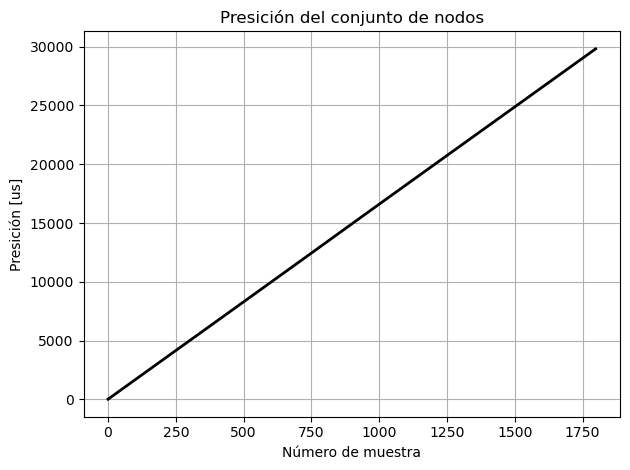

In [26]:
# Se grafica la presición
fig, ax = plt.subplots(1,1)

#ax.plot(pi_123,'ko',markersize=2)
ax.plot(pi_123,'k-',linewidth=2.0)

ax.set_xlabel("Número de muestra")
ax.set_ylabel("Presición [us]")
ax.set_title("Presición del conjunto de nodos")
ax.grid(True)

fig.tight_layout()